In [201]:
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.naive_bayes import GaussianNB
samples, labels = load_boston(return_X_y=True)

In [204]:
def cross_validation_split(k):
    dataset_split = list()
    labels_split = list()
    data = samples
    fold_size = int(len(samples)/k)
    for i in range(k):
        fold = []
        labels_fold = []
        while len(fold) < fold_size:
            index = randrange(len(data))
            fold.append(data[index,:])
            labels_fold.append(labels[index])
            data = np.delete(data, (index), axis=0)
        fold = np.asarray(fold)
        labels_fold = np.asarray(labels_fold)
        dataset_split.append(fold)
        labels_split.append(labels_fold)
#         print(len(labels_split))
#     returnlist = []
#     returnlist.append(dataset_split, labels_split)
    return dataset_split, labels_split
#     testSet = samples[:]
#     print(testSet.shape)

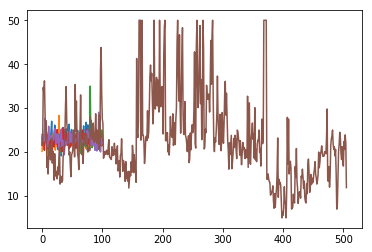

average prediction error:  [ 3700.48590102]


In [235]:
# X = np.column_stack((samples, np.ones((506, 1))))
# labels = labels.reshape(506,1)
# w = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ labels
# print(w.shape)
# y_hat = X @ w
# sum = 0
# for i in range(506):
#     sum += (labels[i]-y_hat[i])**2
# print(sum)
total_sum = 0
# total_y_hat = []
dataset_split, labels_split = cross_validation_split(5)
for i in range(len(dataset_split)):
    dataset = dataset_split.copy()
    labels_set = labels_split.copy()
    test_set = dataset[i]
    test_labels = labels_set[i]
    del dataset[i]
    del labels_set[i]
    train_data = np.array(dataset[0])
    train_labels = np.array(labels_set[0])
    train_labels = train_labels.reshape(101,1)
    for j in range(1,len(dataset)):
        train_data = np.vstack((train_data, dataset[j]))
        label = labels_set[j].reshape(101,1)
        train_labels = np.vstack((train_labels, label))
#         print(train_labels.shape)
    X = np.column_stack((train_data, np.ones((train_data.shape[0], 1))))
#     print(X.shape)
#     train_labels = train_labels.reshape(train_labels.shape,1)
    w = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ train_labels
    X_test = np.column_stack((test_set, np.ones((test_set.shape[0], 1))))
    y_hat = X_test @ w
    plt.plot(y_hat)
#     print(y_hat)
    sum = 0
    for i in range(y_hat.shape[0]):
        sum += (labels[i]-y_hat[i])**2
    total_sum += sum
avg_pred_error = total_sum/5
plt.plot(labels)
plt.show()
print("average prediction error: ", avg_pred_error)
#     print(test_labels.shape)